In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [7]:
os.chdir('C:\\Users\\Grishma\\Desktop\\BAby')
if os.path.isdir('train/0/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    
    shutil.move(f'Present',f'train')
    os.mkdir(f'valid/Present')
    os.mkdir(f'test/Present')

    valid_samples = random.sample(os.listdir(f'train/Present'), 10)
    for j in valid_samples:
        shutil.move(f'train/Present/{j}', f'valid/Present')

    test_samples = random.sample(os.listdir(f'train/Present'), 5)
    for k in test_samples:
        shutil.move(f'train/Present/{k}', f'test/Present')
os.chdir('../..')

In [27]:
import os
from PIL import Image
folder_path = "C:\\Users\\Grishma\\Desktop\\BAby\\Try"
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])
    

In [8]:
os.chdir('C:\\Users\\Grishma\\Desktop\\BAby')

shutil.move(f'Not',f'train')
os.mkdir(f'valid/Not')
os.mkdir(f'test/Not')

valid_samples = random.sample(os.listdir(f'train/Not'), 7)
for j in valid_samples:
    shutil.move(f'train/Not/{j}', f'valid/Not')

test_samples = random.sample(os.listdir(f'train/Not'), 5)
for k in test_samples:
    shutil.move(f'train/Not/{k}', f'test/Not')

In [29]:
train_path = 'C:\\Users\\Grishma\\Desktop\\BAby\\train'
valid_path = 'C:\\Users\\Grishma\\Desktop\\BAby\\valid'
test_path = 'C:\\Users\\Grishma\\Desktop\\BAby\\test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 88 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [11]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
17227776/17225924 [==============================] - 62s 4us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_____________________

In [12]:
x=mobile.layers[-6].output
output=Dense(units=2,activation='softmax')(x)

In [13]:
model=Model(inputs=mobile.input,outputs=output)

In [14]:
for layer in model.layers[:-23]:
    layer.trainable=False

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [97]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [98]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=8,verbose=2,batch_size=10)

Epoch 1/8
2/2 [==============================] - 6s 3s/step - loss: 1.0277 - acc: 0.8125
 - 65s - loss: 0.1488 - acc: 0.9886 - val_loss: 1.0277 - val_acc: 0.8125
Epoch 2/8
2/2 [==============================] - 3s 1s/step - loss: 2.0227 - acc: 0.7500
 - 52s - loss: 6.7585e-04 - acc: 1.0000 - val_loss: 2.0227 - val_acc: 0.7500
Epoch 3/8
2/2 [==============================] - 3s 1s/step - loss: 1.4431 - acc: 0.8750
 - 52s - loss: 0.0114 - acc: 0.9886 - val_loss: 1.4431 - val_acc: 0.8750
Epoch 4/8
2/2 [==============================] - 4s 2s/step - loss: 1.2033 - acc: 0.8750
 - 53s - loss: 0.0120 - acc: 0.9886 - val_loss: 1.2033 - val_acc: 0.8750
Epoch 5/8
2/2 [==============================] - 3s 1s/step - loss: 0.7831 - acc: 0.9375
 - 53s - loss: 0.0529 - acc: 0.9886 - val_loss: 0.7831 - val_acc: 0.9375
Epoch 6/8
2/2 [==============================] - 3s 1s/step - loss: 1.1119 - acc: 0.8125
 - 51s - loss: 0.0618 - acc: 0.9886 - val_loss: 1.1119 - val_acc: 0.8125
Epoch 7/8
2/2 [=========

In [99]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)


In [101]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [102]:
test_batches.class_indices


{'Not': 0, 'Present': 1}

Confusion matrix, without normalization
[[5 0]
 [0 5]]


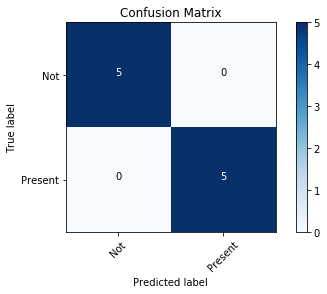

In [103]:
cm_plot_labels = ['Not','Present']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [110]:
import cv2

img = cv2.imread("C:\\Users\\Grishma\\Downloads\\download (26).jpg")
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])

classes = np.round(model.predict(img))

print( classes)

[[1. 0.]]


In [47]:
model.save('baby')